In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
%load_ext autoreload
%autoreload

df = pd.read_csv('adyen-dataset.csv')

In [2]:
df["time"] = pd.to_datetime(df['hour_of_day'].astype(str) + ":" + df['minute_of_hour'].astype(str) + ":00", format="%H:%M:%S")

In [4]:
df["time"] = np.where(df['minute_of_hour'] < 30, pd.to_datetime(df['hour_of_day'].astype(str) + ":00" + ":00", format="%H:%M:%S"), \
                                                 pd.to_datetime(df['hour_of_day'].astype(str) + ":30" + ":00", format="%H:%M:%S"))
df

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,time
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,...,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False,1900-01-01 13:30:00
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,...,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False,1900-01-01 15:00:00
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,...,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False,1900-01-01 01:30:00
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,...,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True,1900-01-01 12:30:00
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,...,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False,1900-01-01 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138696,58957356926,Merchant D,Other,2021,10,6,312,True,35.13,BR,...,Windows,947PJ1zh6yFwZxGOYG8Lnw,ReVzz-e9w8mNO63YA1cjFA,DJHwui3GH60rBpx_tAOZZw,Ecommerce,BZD,4920,True,False,1900-01-01 10:00:00
138697,44780141989,Merchant D,MasterCard,2021,10,42,198,False,411.11,NL,...,MacOS,NaN,Acshv7Bba4JnO0gwpHu5bw,VnFgfzDi69Hsw2mpWvJuIA,POS,2039,4645,False,False,1900-01-01 10:30:00
138698,34619316012,Merchant A,MasterCard,2021,23,48,276,True,29.03,BR,...,Android,-mT_MQEgvNfb5RkbW0oejw,RSYkLbETJb2V9f705zmCkQ,iDlX7WaccSDt1GpQNj5JBQ,Ecommerce,AAD,4571,False,False,1900-01-01 23:30:00
138699,68700535373,Merchant A,Other,2021,21,23,307,True,273.14,NL,...,iOS,13Jg3lRGPEoM3c_vLM-SVQ,Hr4m7amS_osGvEy8O6qVQQ,kFgBFY0u8l72rwwHj7EBtg,Ecommerce,1104,4556,True,False,1900-01-01 21:00:00


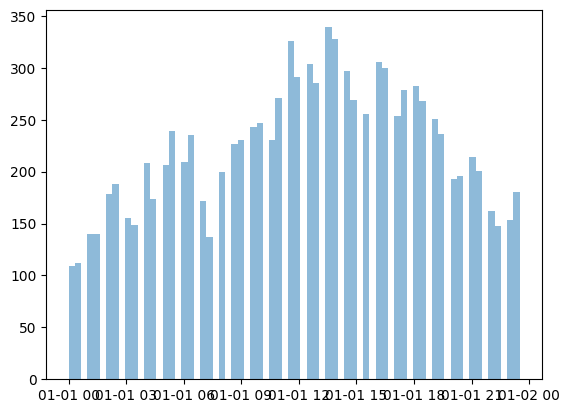

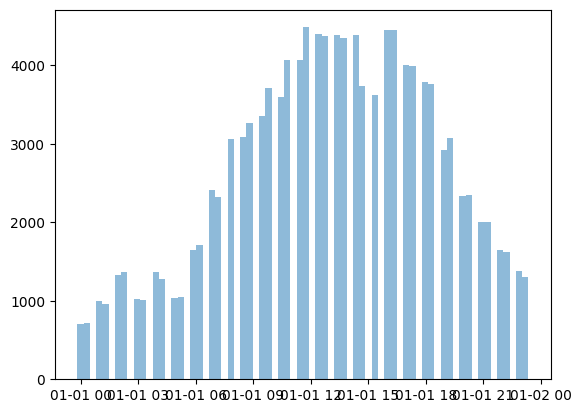

In [8]:

plt.hist(df[df["has_fraudulent_dispute"] == True]["time"], 72, alpha = 0.5, align='mid')
plt.show()
plt.hist(df[df["has_fraudulent_dispute"] == False]["time"], 72, alpha = 0.5, align='left')
plt.show()

In [103]:
df[df["has_fraudulent_dispute"] == True]["time"]
df[df["has_fraudulent_dispute"] == False]["time"]


,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,time
7,42353694618,Merchant A,MasterCard,2021,17,42,323,True,244.17,NL,...,Windows,NaN,MpwCXjoBbuJoLA3pRc2Zsw,beNTt0aybtIdzY5vp1D99A,Ecommerce,1093,4802,True,False,1900-01-01 17:42:00
13,21696416452,Merchant B,Amex,2021,18,21,328,True,23.92,NL,...,Linux,NaN,VifmXDu_B8czGx3rDcO2Lg,p2bugYfCBQea6u47vcT8NA,Ecommerce,1104,4916,True,False,1900-01-01 18:21:00
18,36985096096,Merchant E,Visa,2021,17,8,278,True,151.44,BR,...,Windows,NaN,n1INnXQ7sFTpD4SVpPJkaA,93XdgsDVL1xKxymF_yUkZA,Ecommerce,BZD,4916,True,False,1900-01-01 17:08:00
47,39248942163,Merchant A,Visa,2021,18,29,290,True,43.19,IT,...,Linux,kox7WvsztfKEOb307u0fnQ,NaN,YuyevybAzhGC4208mQp8fw,Ecommerce,NaN,4556,True,False,1900-01-01 18:29:00
48,33358915387,Merchant D,Visa,2021,4,43,359,True,135.49,BR,...,Linux,uXIVxurtAXx8ne-c9ha2NA,wD84XEh6QWcYRhx7FQud_g,5XSkRT4rSQYdwXx22lD1nQ,Ecommerce,BZD,4645,True,False,1900-01-01 04:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138677,24400041526,Merchant A,MasterCard,2021,17,49,113,True,475.23,BR,...,iOS,j2PQ6GVV3ZO-1-dhTjgLZQ,LS4MbXapclJIHPvdiPQ6cA,8pRRhuIhqAhkd79KdVV9tw,Ecommerce,BZD,4571,True,False,1900-01-01 17:49:00
138692,58881175828,Merchant A,Other,2021,15,34,220,True,4.23,NL,...,Other,PrKynTlyny05lum_IwwFLA,qQAyk7PV_wc51vTIxzc8CA,rzVRQc32dLUobW1JAkufeQ,Ecommerce,2039,4571,True,False,1900-01-01 15:34:00
138695,17311171741,Merchant B,Visa,2021,6,50,363,True,231.96,ZW,...,iOS,TxWQp5Ln2d9W28pSM3WFMQ,DyGlPfQWWURqtN3TugAYCA,ib0z1DAwUlKhUsQpvIUP6g,Ecommerce,BB,4622,True,False,1900-01-01 06:50:00
138696,58957356926,Merchant D,Other,2021,10,6,312,True,35.13,BR,...,Windows,947PJ1zh6yFwZxGOYG8Lnw,ReVzz-e9w8mNO63YA1cjFA,DJHwui3GH60rBpx_tAOZZw,Ecommerce,BZD,4920,True,False,1900-01-01 10:06:00
